In [61]:
data = ["The amount of pollution is increasing day by day",
"The concert was just great", "I love to see Gordon Ramsay cook",
"Google is introducing a new technlogy", "AI robots are great example of great technology present today",
"All of us were singing in the concert", "We have launch campaigns to stop pollution and global warming"]

In [2]:
data

['The amount of pollution is increasing day by day',
 'The concert was just great',
 'I love to see Gordon Ramsay cook',
 'Google is introducing a new technlogy',
 'AI robots are great example of great technology present today',
 'All of us were singing in the concert',
 'We have launch campaigns to stop pollution and global warming']

In [3]:
import pandas as pd
data = pd.DataFrame(data)

In [5]:
data.columns = ["text"]

In [6]:
data

,text
0,The amount of pollution is increasing day by day
1,The concert was just great
2,I love to see Gordon Ramsay cook
3,Google is introducing a new technlogy
4,AI robots are great example of great technolog...
5,All of us were singing in the concert
6,We have launch campaigns to stop pollution and...


In [7]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [10]:
data = data["text"].tolist()

In [11]:
data

['The amount of pollution is increasing day by day',
 'The concert was just great',
 'I love to see Gordon Ramsay cook',
 'Google is introducing a new technlogy',
 'AI robots are great example of great technology present today',
 'All of us were singing in the concert',
 'We have launch campaigns to stop pollution and global warming']

In [12]:
text = [my_tokenizer(s) for s in data]

In [18]:
text

[['amount', 'pollution', 'increasing', 'day', 'day'],
 ['concert', 'wa', 'great'],
 ['love', 'see', 'gordon', 'ramsay', 'cook'],
 ['google', 'introducing', 'new', 'technlogy'],
 ['robot', 'great', 'example', 'great', 'technology', 'present', 'today'],
 ['singing', 'concert'],
 ['launch', 'campaign', 'stop', 'pollution', 'global', 'warming']]

In [19]:
from sklearn.decomposition import TruncatedSVD

In [23]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data)

In [24]:
X

<7x42 sparse matrix of type '<class 'numpy.float64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [25]:
lsa = TruncatedSVD(n_components=4,n_iter=100)


In [27]:
lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=None, tol=0.0)

In [28]:
lsa.components_[0]

array([0.11696462, 0.1707732 , 0.10318835, 0.01935276, 0.11696462,
       0.10318835, 0.01935276, 0.35741668, 0.00567144, 0.20637669,
       0.11696462, 0.01935276, 0.03668901, 0.00567144, 0.40984162,
       0.01935276, 0.1707732 , 0.10318835, 0.03668901, 0.11611022,
       0.25980475, 0.01935276, 0.00567144, 0.03668901, 0.27737381,
       0.10171964, 0.11696462, 0.00567144, 0.11696462, 0.00567144,
       0.1707732 , 0.01935276, 0.03668901, 0.11696462, 0.37872315,
       0.02077223, 0.11696462, 0.1707732 , 0.01935276, 0.25980475,
       0.01935276, 0.1707732 ])

In [29]:
words = tfidf.get_feature_names()

In [30]:
words

['ai',
 'all',
 'amount',
 'and',
 'are',
 'by',
 'campaigns',
 'concert',
 'cook',
 'day',
 'example',
 'global',
 'google',
 'gordon',
 'great',
 'have',
 'in',
 'increasing',
 'introducing',
 'is',
 'just',
 'launch',
 'love',
 'new',
 'of',
 'pollution',
 'present',
 'ramsay',
 'robots',
 'see',
 'singing',
 'stop',
 'technlogy',
 'technology',
 'the',
 'to',
 'today',
 'us',
 'warming',
 'was',
 'we',
 'were']

In [31]:
for i,y in enumerate(lsa.components_):
    componentwords = zip(words, y)
    sortedComponentwords = sorted(componentwords, key = lambda x: x[1],
                                reverse=True)
    sortedComponentwords = sortedComponentwords[:10]
    print ("\nTopic", i, ";")
    for x in sortedComponentwords:
        print (x)


Topic 0 ;
('great', 0.40984162355340076)
('the', 0.37872314722187905)
('concert', 0.3574166811716594)
('of', 0.27737380673259016)
('just', 0.259804752702269)
('was', 0.259804752702269)
('day', 0.20637669367094524)
('all', 0.17077320324892342)
('in', 0.17077320324892342)
('singing', 0.17077320324892342)

Topic 1 ;
('to', 0.3218414494137734)
('pollution', 0.26410761357197915)
('day', 0.2490207719189292)
('is', 0.22901149256839073)
('cook', 0.19406202788196975)
('gordon', 0.19406202788196975)
('love', 0.19406202788196975)
('ramsay', 0.19406202788196975)
('see', 0.19406202788196975)
('and', 0.19365863746211864)

Topic 2 ;
('is', 0.34424073742032524)
('google', 0.29368746403512613)
('introducing', 0.29368746403512613)
('new', 0.29368746403512613)
('technlogy', 0.29368746403512613)
('day', 0.24203500650628626)
('by', 0.12101750325314313)
('increasing', 0.12101750325314313)
('amount', 0.12101750325314305)
('of', 0.046070154585006184)

Topic 3 ;
('great', 0.36097341569294406)
('google', 0.218

In [37]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint
from gensim.models import CoherenceModel
from gensim.models import LsiModel

In [38]:
id2word = corpora.Dictionary(text)

In [40]:
print (id2word)

Dictionary(27 unique tokens: ['amount', 'day', 'increasing', 'pollution', 'concert']...)


In [41]:
print (id2word.token2id)

{'amount': 0, 'day': 1, 'increasing': 2, 'pollution': 3, 'concert': 4, 'great': 5, 'wa': 6, 'cook': 7, 'gordon': 8, 'love': 9, 'ramsay': 10, 'see': 11, 'google': 12, 'introducing': 13, 'new': 14, 'technlogy': 15, 'example': 16, 'present': 17, 'robot': 18, 'technology': 19, 'today': 20, 'singing': 21, 'campaign': 22, 'global': 23, 'launch': 24, 'stop': 25, 'warming': 26}


In [42]:
mycorpus = [id2word.doc2bow(s) for s in text]

In [43]:
mycorpus

[[(0, 1), (1, 2), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1)],
 [(5, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(4, 1), (21, 1)],
 [(3, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]

In [44]:
text[0]


['amount', 'pollution', 'increasing', 'day', 'day']

In [66]:
lsi_model = LsiModel(corpus=mycorpus, id2word=id2word, num_topics=7, decay=0.5)

lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [69]:
pprint(lsi_model.print_topics())


[(0,
  '0.711*"great" + 0.308*"example" + 0.308*"today" + 0.308*"technology" + '
  '0.308*"robot" + 0.308*"present" + 0.107*"concert" + 0.095*"wa" + '
  '0.012*"singing" + -0.000*"cook"'),
 (1,
  '0.616*"day" + 0.499*"pollution" + 0.308*"increasing" + 0.308*"amount" + '
  '0.190*"stop" + 0.190*"launch" + 0.190*"warming" + 0.190*"campaign" + '
  '0.190*"global" + -0.000*"singing"'),
 (2,
  '-0.453*"day" + 0.367*"campaign" + 0.367*"global" + 0.367*"warming" + '
  '0.367*"stop" + 0.367*"launch" + -0.227*"amount" + -0.227*"increasing" + '
  '0.140*"pollution" + -0.000*"concert"'),
 (3,
  '0.447*"cook" + 0.447*"ramsay" + 0.447*"love" + 0.447*"gordon" + 0.447*"see" '
  '+ 0.000*"introducing" + 0.000*"technlogy" + 0.000*"new" + 0.000*"google" + '
  '-0.000*"concert"'),
 (4,
  '0.500*"technlogy" + 0.500*"new" + 0.500*"google" + 0.500*"introducing" + '
  '-0.000*"gordon" + -0.000*"cook" + -0.000*"love" + -0.000*"see" + '
  '-0.000*"ramsay" + -0.000*"singing"'),
 (5,
  '-0.766*"concert" + -0.413

In [72]:
doc_lsa = lsi_model[mycorpus]

In [73]:
pprint(lda_model.print_topics())
doc_lda = lda_model[mycorpus]

[(0,
  '0.127*"concert" + 0.070*"pollution" + 0.070*"launch" + 0.070*"global" + '
  '0.070*"stop" + 0.070*"warming" + 0.070*"campaign" + 0.070*"wa" + '
  '0.070*"great" + 0.070*"singing"'),
 (1,
  '0.116*"new" + 0.116*"introducing" + 0.116*"google" + 0.116*"technlogy" + '
  '0.023*"singing" + 0.023*"concert" + 0.023*"great" + 0.023*"pollution" + '
  '0.023*"wa" + 0.023*"day"'),
 (2,
  '0.120*"great" + 0.120*"day" + 0.067*"today" + 0.067*"technology" + '
  '0.067*"present" + 0.067*"robot" + 0.067*"example" + 0.067*"amount" + '
  '0.067*"increasing" + 0.067*"pollution"'),
 (3,
  '0.106*"love" + 0.106*"ramsay" + 0.106*"gordon" + 0.106*"cook" + 0.106*"see" '
  '+ 0.021*"technlogy" + 0.021*"google" + 0.021*"introducing" + 0.021*"new" + '
  '0.021*"singing"')]


In [83]:
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()

print('\nCoherence Score LSI: ', coherence_lsa)


Coherence Score LSI:  0.49139799970503095


In [82]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score LDA: ', coherence_lda)


Coherence Score LDA:  0.5685180008191147


In [79]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# LDA model 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.110827 -0.051486       1        1  37.348324
0     -0.012684  0.115331       2        1  33.923306
3      0.077338 -0.041562       3        1  15.937591
1      0.046173 -0.022282       4        1  12.790784, topic_info=   Category      Freq         Term     Total  loglift  logprob
14  Default  0.000000          new  0.000000  27.0000  27.0000
13  Default  0.000000  introducing  0.000000  26.0000  26.0000
12  Default  0.000000       google  0.000000  25.0000  25.0000
15  Default  0.000000    technlogy  0.000000  24.0000  24.0000
9   Default  0.000000         love  0.000000  23.0000  23.0000
..      ...       ...          ...       ...      ...      ...
20   Topic4  0.095202        today  1.153364  -0.4380  -3.7610
4    Topic4  0.095241      concert  1.739080  -0.8483  -3.7606
3    Topic4  0.095224    pollution  1.764912  -0.8632  -3.7608
1    Topic4  0.095218          day  1.790776  -0.8778  -3.7609
5    Topic4  0.095230        great  2.402360  -1.1715  -3.7607

[135 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.867037      amount
22        2  0.886904    campaign
4         2  0.575017     concert
7         3  1.052701        cook
1         1  0.558417         day
16        1  0.867031     example
23        2  0.886901      global
8         3  1.052702      gordon
5         1  0.416257       great
5         2  0.416257       great
2         1  0.867038  increasing
24        2  0.886901      launch
9         3  1.052703        love
3         1  0.566600   pollution
3         2  0.566600   pollution
17        1  0.867030     present
10        3  1.052702      ramsay
18        1  0.867031       robot
11        3  1.052698         see
21        2  0.886929     singing
25        2  0.886902        stop
19        1  0.867030  technology
20        1  0.867029       today
6         2  0.886914          wa
26        2  0.886903     warming, R=27, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [81]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [86]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=text, start=2, limit=40, step=6)

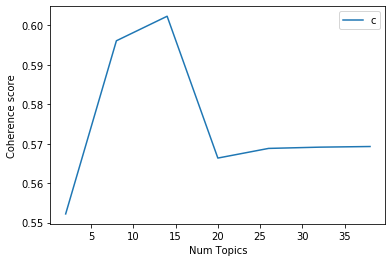

In [87]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [88]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.5522
Num Topics = 8  has Coherence Value of 0.5961
Num Topics = 14  has Coherence Value of 0.6023
Num Topics = 20  has Coherence Value of 0.5664
Num Topics = 26  has Coherence Value of 0.5688
Num Topics = 32  has Coherence Value of 0.5691
Num Topics = 38  has Coherence Value of 0.5693
